In [6]:
%matplotlib inline
#import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Rôle du taux de décharge de l'entrée

L'activité neuronale de la population source est définie par un processus de Poisson homogène. 
L'activité de la population source est l'énergie apportée au RRNN. Il est alors important d'observer l'effet d'une manipulation de cette activité sur le comportement du réseau.

Pour chaque valeur de taux de décharge de la population source une simulation du RRNN est exécutée et des rasterplots des populations source, exciatrice (E) et inhibitrice (I) sont affichés.

Il est remarqué qu'une augmentation suffisante de l'activité de la population source induit une augmentation d'activité dans les populations E et I. Cette discontinuité suggère l'existence d'un filtre entre la population source et les deux autres.

### Rôle du poids de l'entrée

Les rasterplots générés sur une manipulation de l'activité de la population source montrent l'existence de filtres entre l'activité de la source et l'activité du réseau. Le poids de l'entrée est un de ces filtres. Ce paramètre détermine les valeurs des poids des connexions synaptiques entre les neurones de la source et les neurones de la population E. Ici, son effet sur le comportement du réseau est étudié.

Pour cela, un rasterplot des trois populations est généré par valeur du poids de l'entrée

Il s'avère que l'augmentation du poids de l'entrée induit une augmentation de l'activité du réseau.
            
### Courbes de taux de décharge en fonction de l'activité et du poids de l'entrée

Les rasterplots permet d'avoir un aperçu qualitatif de l'activité d'une population neuronale. Cependant, il est nécessaire de pouvoir observer de façon quantitative cette activité. Ici, les effets de la manipulation de l'activité de la population source ainsi que du poids de celle-ci sur l'activité du réseau sont réexaminés. 

Pour chacun des deux paramètres, une simulation du modèle est exécutée par valeur prise par le paramètre étudié et le taux de décharge neuronal moyen des populations E et I est recupéré. Chaque point d'une courbe étant défini par le couple (valeur du paramètre, taux de décharge), une courbe représente donc la variation de taux de décharge en fonction de la manipulation d'un paramètre.

Il s'avère que le taux de décharge augmente bien quand l'activité de la population source ou le poids de l'entrée augmentent.           


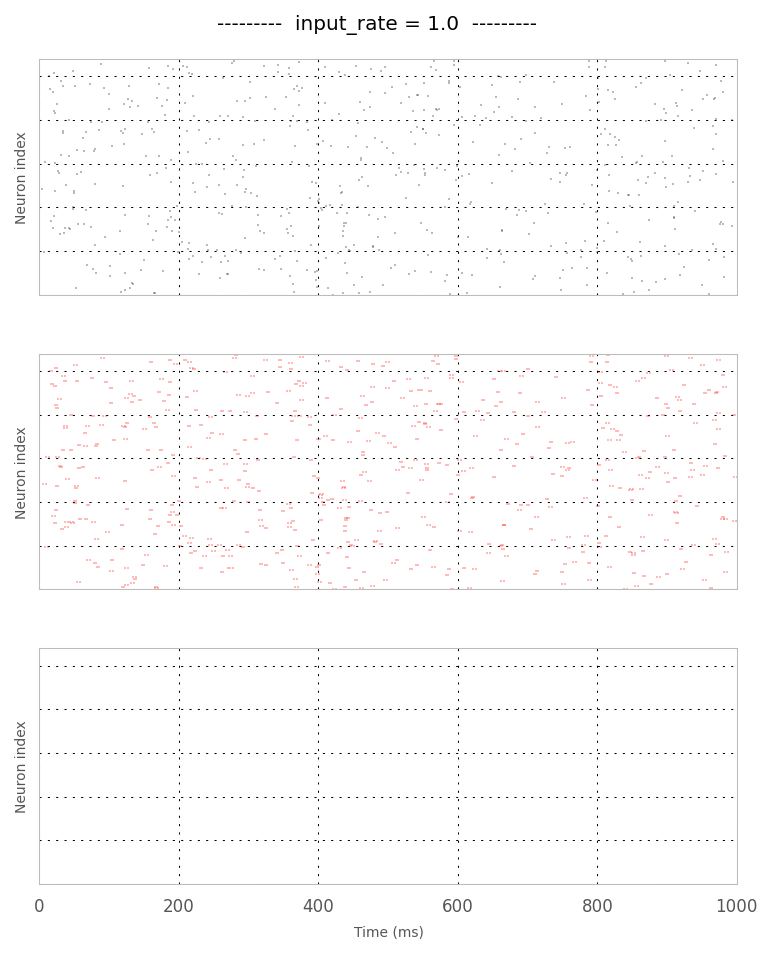

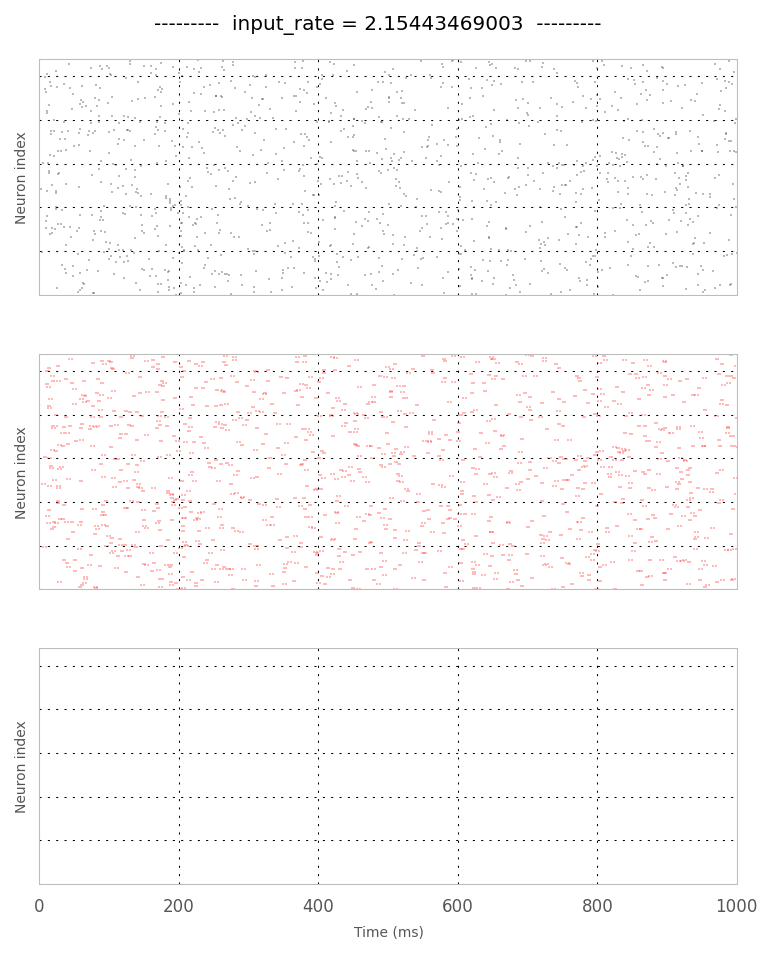

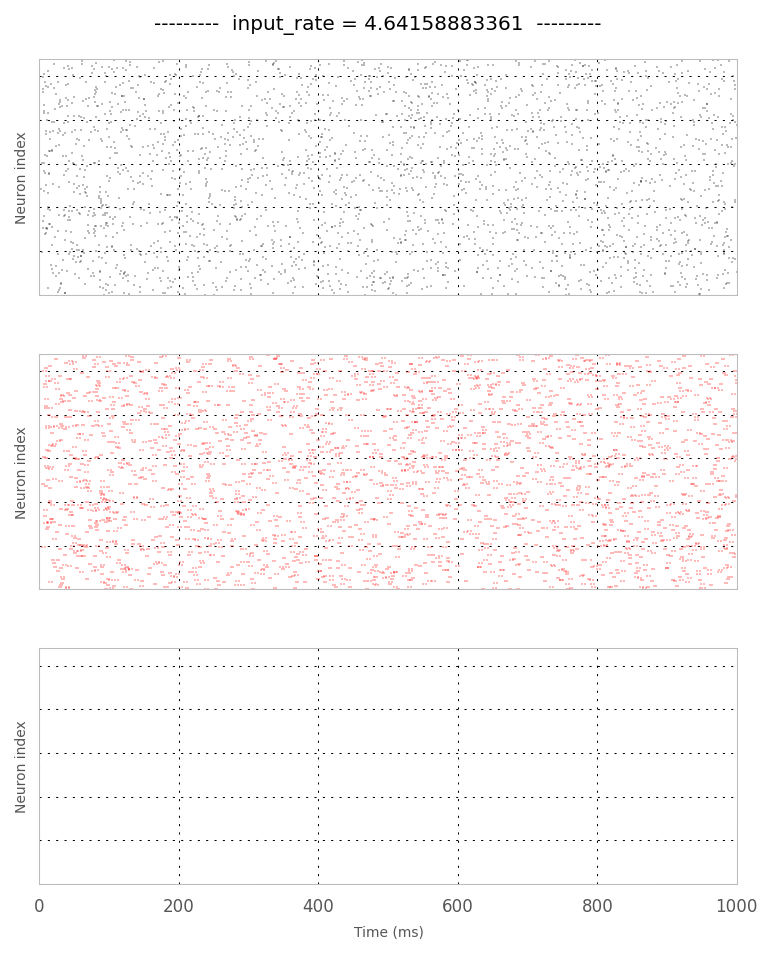

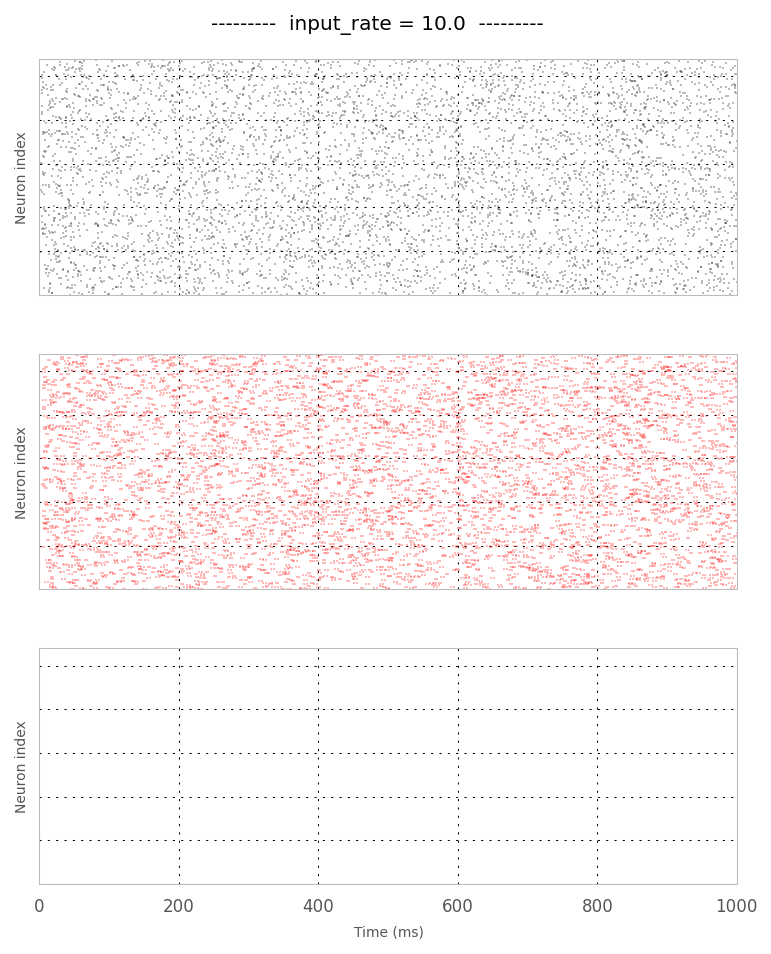

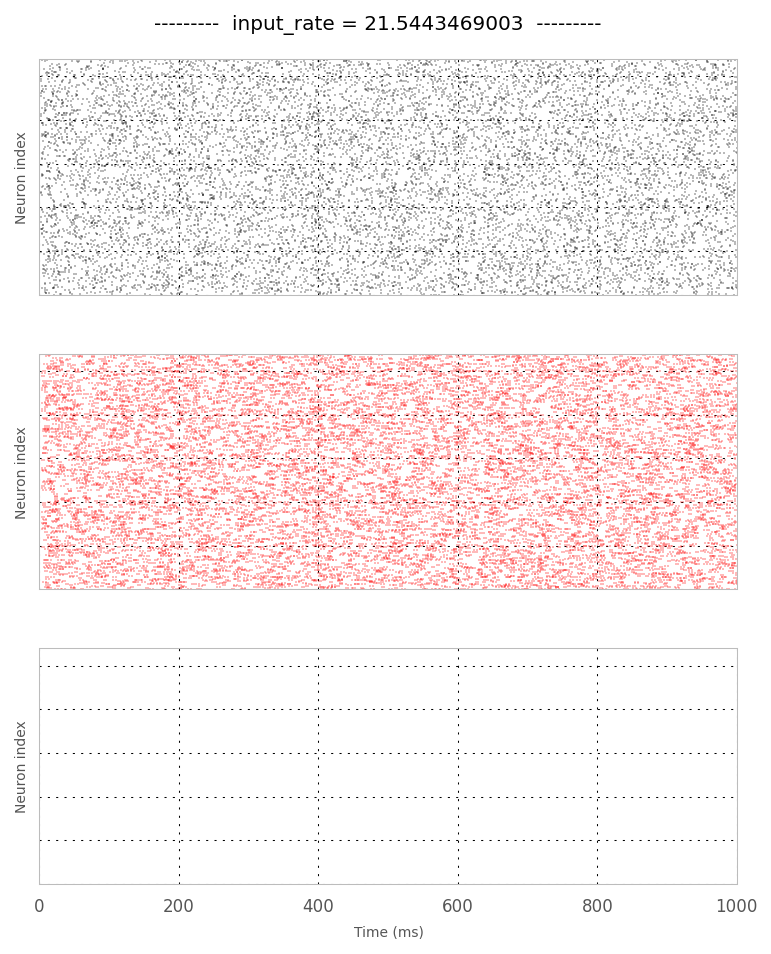

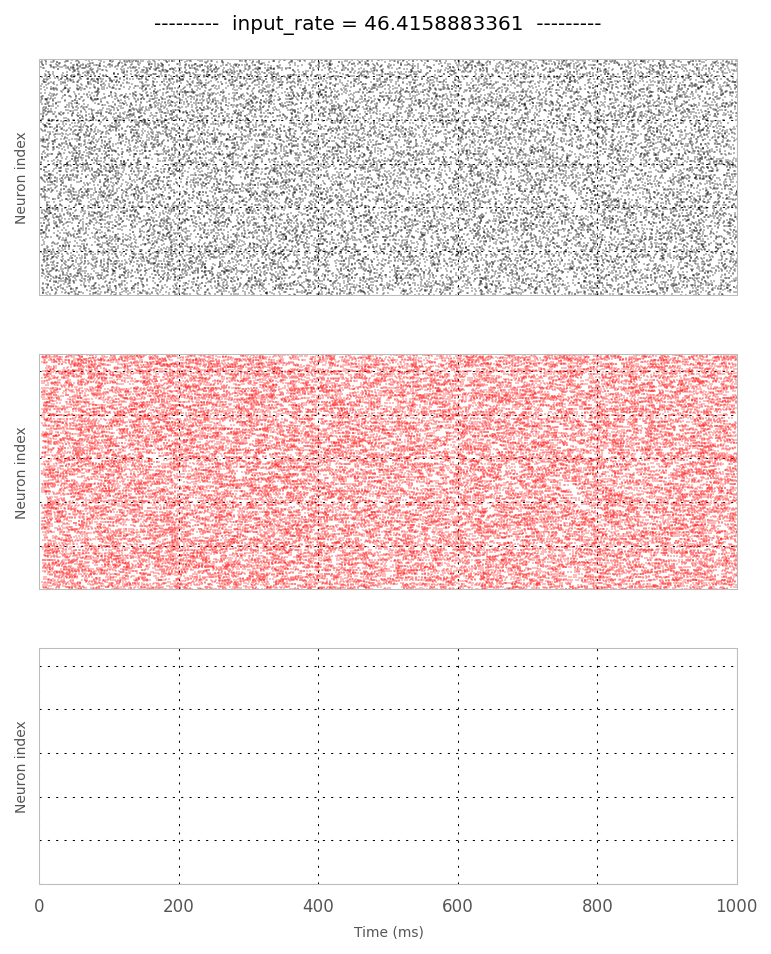

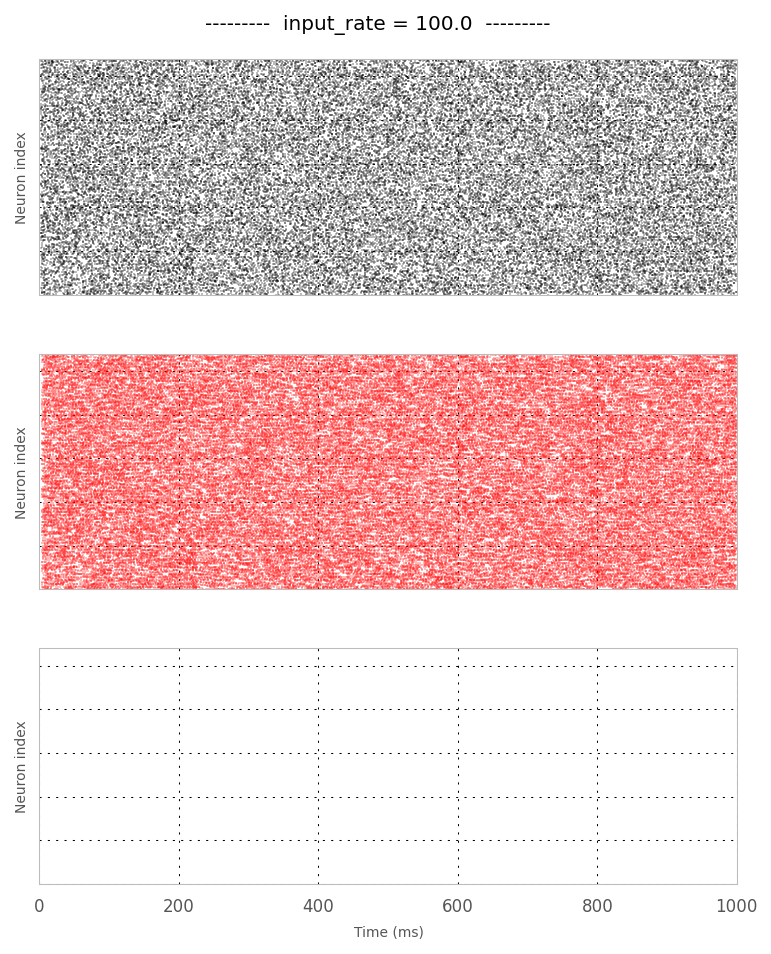

In [7]:
from RRNN import RRNN
import numpy as np


n_sim_each, time = 5, 100
n_sim_each, time = 25, 1000
n_sim_each, time = 7, 1000

net = RRNN(time=time)
_ = net.variationRaster('input_rate', net.sim_params['input_rate'] * np.logspace(-1, 1, n_sim_each))
#_ = net.variationRaster('input_rate', net.sim_params['input_rate'] * np.logspace(-.2, .2, 10))

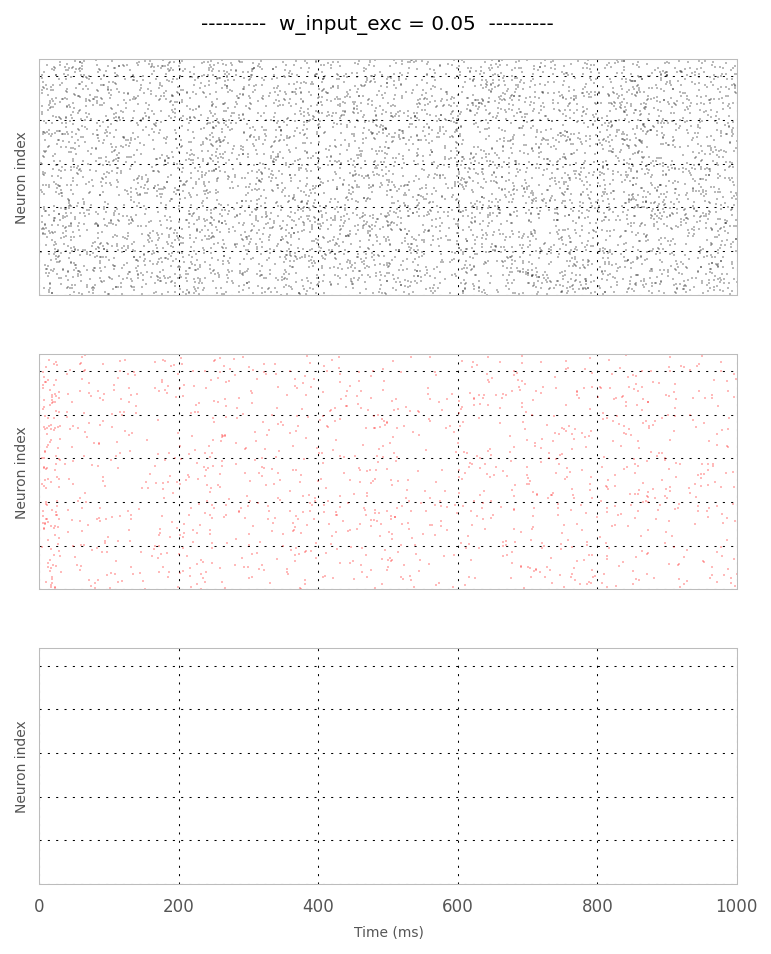

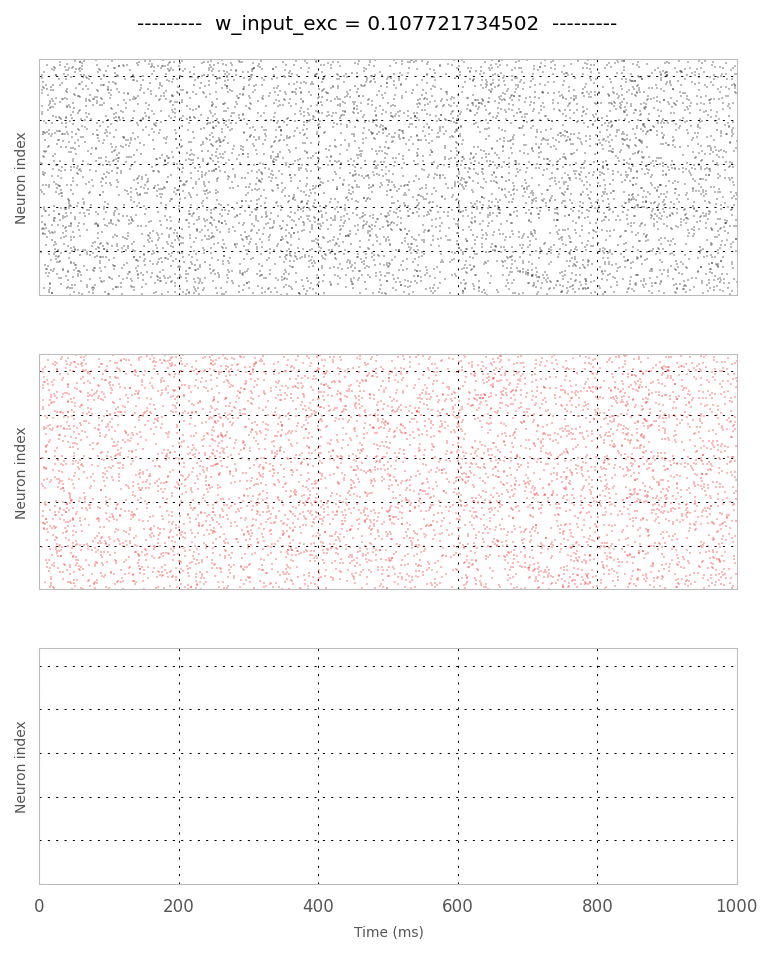

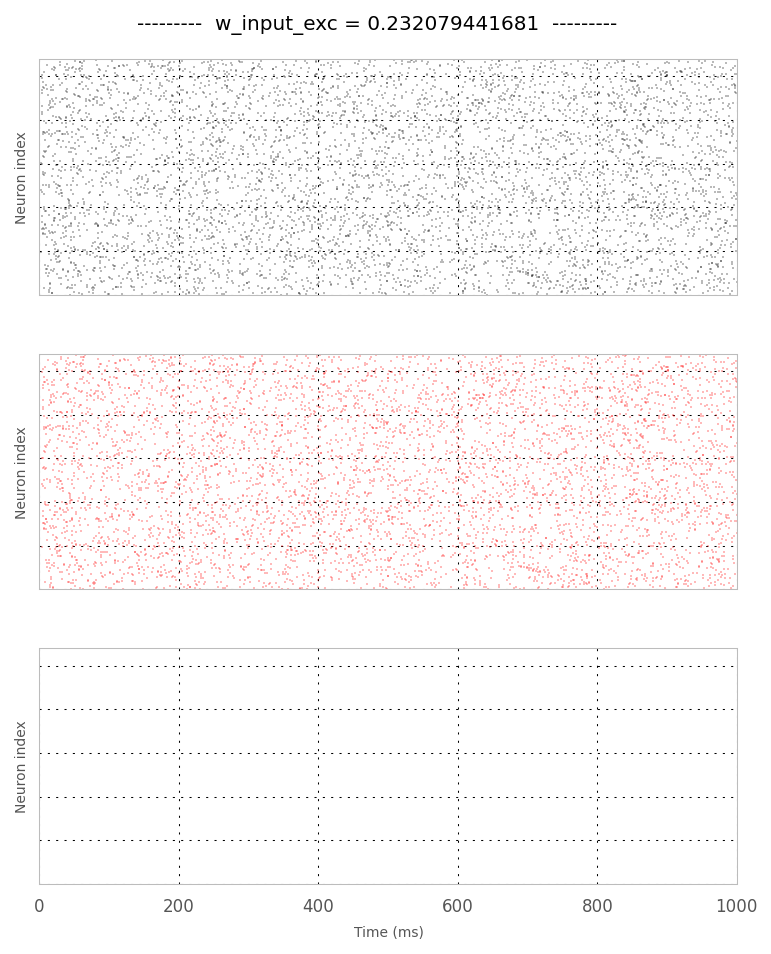

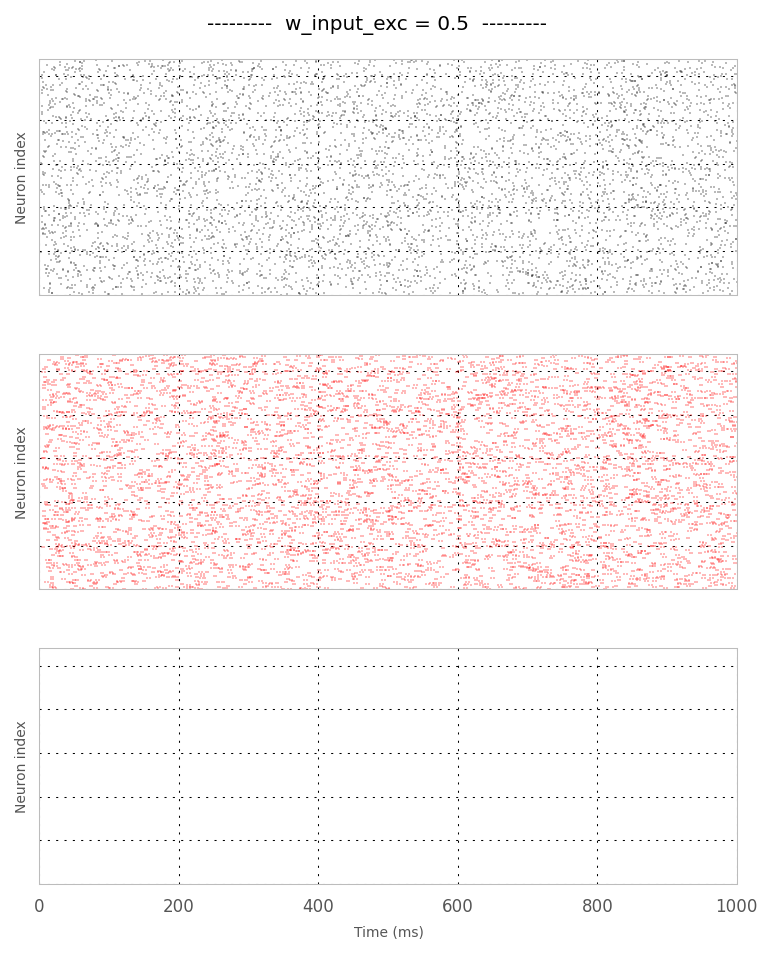

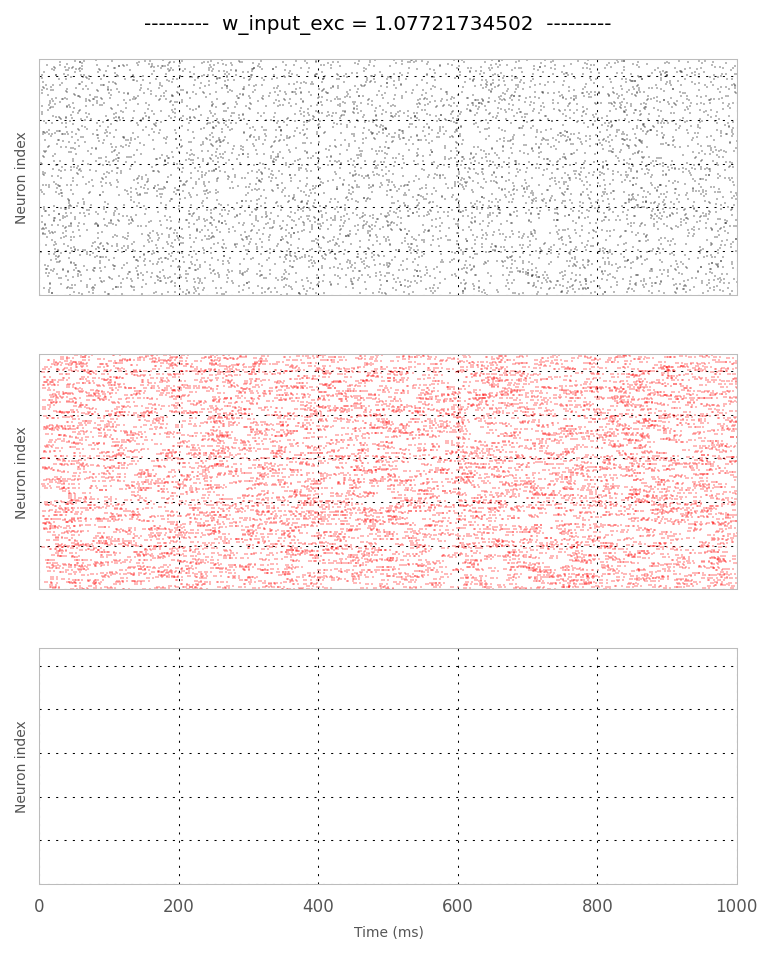

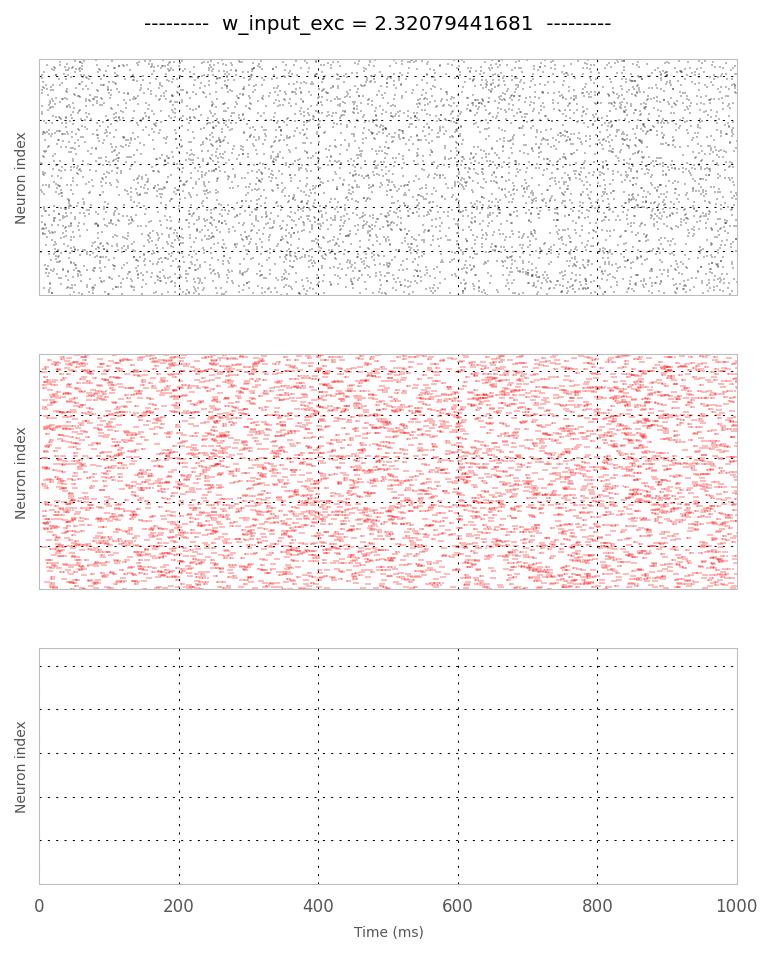

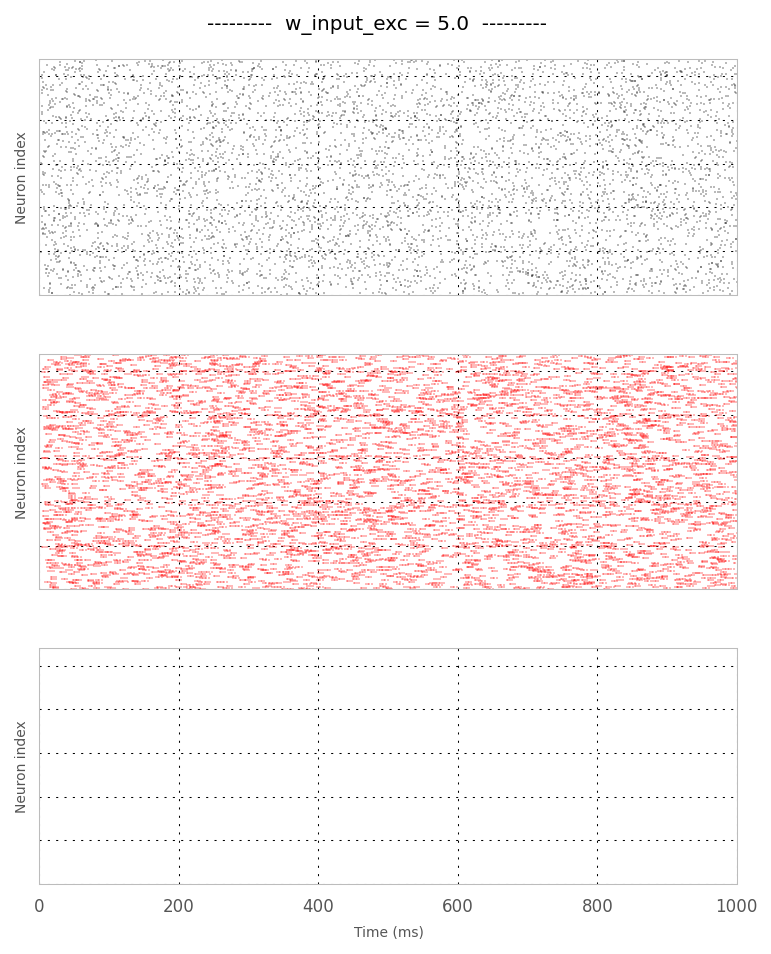

In [8]:
_ = net.variationRaster('w_input_exc', net.sim_params['w_input_exc']*np.logspace(-1, 1, n_sim_each))

# stoooop
n_sim_each, time = 25, 100

net = RRNN(time = time)
sim_list = [
            ('input_rate' , net.sim_params['input_rate']*np.logspace(-1, .3, n_sim_each)),
            ('w_input_exc', net.sim_params['w_input_exc']*np.logspace(-1, 1, n_sim_each)),
]

net.paramRole(sim_list, f_rate_max=None, datapath='/tmp/OB-V1_data/RRNN-IF' + tag)